# Machine Learning Algorithms:
##*`01: Simple Linear Regression`*

## What is a Regression Problem?
In the realm of statistical analysis, regression serves as a methodological approach aimed at forecasting the value of a dependent variable denoted as 'y', based upon the values exhibited by one or more independent variables represented by 'X'.
For instance, one might use regression to ascertain the anticipated marks a student could get based on the number of hours spent studying.

### What is Linear Regression?

Linear Regression is a way to predict the relationship between two varibles by assuming a linear connection between the independent and dependent variables.
* It looks for an optimal line that minimizes the sum of squared differences between predicted and actual values.
* It is a Supervised Machine Learning Algorithm. It takes labelled data as its input to predict the output.
* Regression is employed to predict continuous values for a dependent variable 'y'.

>Linear regression has the following types:
>1. Simple Linear Regression
>2. Multiple Linear Regression
>3. Polynomial Linear Regression


####**INTUITION: Simple linear regression**

In `Simple Linear regression` there is only 1 independent variable on which the target variable depends.

From above definition, linear regression tries to establish a linear relationship between dependent and independent variable. The way it does this is by using the equation of line given as follows:
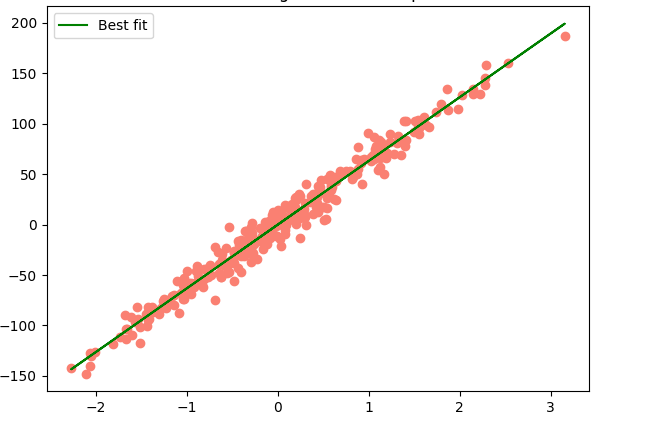

##**$y = $m$x + $b**

Where,
> y = dependent/target variable : Variable to predict

> x = independent variable : Factor which affects 'y'

> b = intercept/offset

> m = slope / weightage : It means how much does `y` depends on 'x' or is influenced by 'x'. If value of `m (slope)` is more, then a unit change in x will cause greater change in y.


Now that we have got some intuition about the algorithm let's try to replicate the LinearRegression class of Sklearn using python.

## Make custom Simple Linear Regression class

We are going to use the method of `Ordinary least squares (OLS)` to create the class since, scikit-learn also uses `OLS` for Linear Regression under the hood.

In [1]:
# Let's build our own class and try to replicate Sklearn's LinearRegression class
class SimpleLinearRegression():

  # Define a constructor and initialize the values of slope and intercept to 0
  def __init__(self):
    self.slope_ = 0
    self.intercept_ = 0

  # In fit function, we will calculate the slope and intercept
  def fit(self, x, y):
    # Calculate the mean of x and y
    x_mean = x.mean()
    y_mean = y.mean()
    numerator = 0
    denominator = 0

    for i in range(x.shape[0]):
      numerator = numerator + ((x[i] - x_mean) * (y[i] - y_mean))
      denominator = denominator + ((x[i] - x_mean)**2)

    self.slope_ = numerator / denominator
    self.intercept_ = y_mean - (self.slope_ * x_mean)

  def predict(self, x):
    return (self.slope_ * x) + self.intercept_

Let's create a toy dataset to compare our class with sklearn's Linear Regression class for univariate data.

In [2]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Make regression data

We need to create a toy data for regression using the Scikit Learn's `make_regression` to test our Linear Regression class.

In [3]:
# Create the toy dataset using the make_regression function
X, y = make_regression(n_samples=300,
                       n_features=1,
                       n_targets=1,
                       noise=10)
len(X), len(y)

(300, 300)

## Sklearn: Linear Regression class

In [4]:
# Set random_state
np.random.seed(42)

# Create the model object
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X, y)

# Make predictions
y_preds_1 = linear_reg.predict(X)

In [5]:
# Calculate the r2 score for data
print(f'R2 Score on data: {r2_score(y,y_preds_1)}')

R2 Score on data: 0.974623079033191


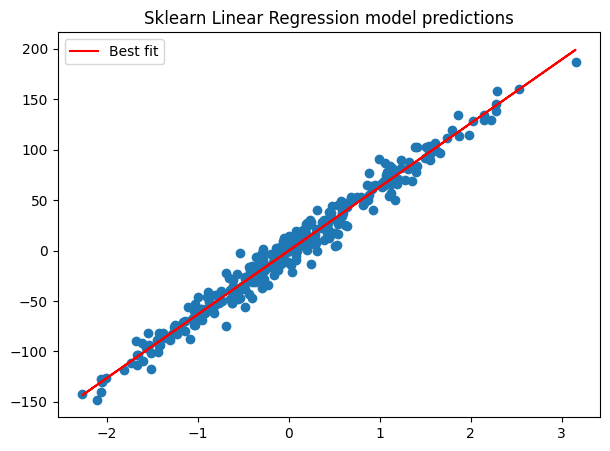

In [6]:
# Plot the data
plt.figure(figsize = (7,5))
plt.scatter(X, y)
plt.plot(X, y_preds_1, c = 'r', label = 'Best fit')
plt.title("Sklearn Linear Regression model predictions")
plt.legend()
plt.show()

In [7]:
# Print the slope and intercept values
print(f'Slope (m): {linear_reg.coef_}')
print(f'Intercept (b): {linear_reg.intercept_}')

Slope (m): [63.10101175]
Intercept (b): -0.001498859883636794


## Custom: Linear Regression class

In [8]:
# Set random seed
np.random.seed(42)

# Instantiate object of our class
simple_lin_reg = SimpleLinearRegression()

# Fit the model on data
simple_lin_reg.fit(X, y)

# Make predictions
y_preds_2 = simple_lin_reg.predict(X)

In [9]:
# Calculate the r2 score for data
print(f'R2 Score on data: {r2_score(y,y_preds_2)}')

R2 Score on data: 0.974623079033191


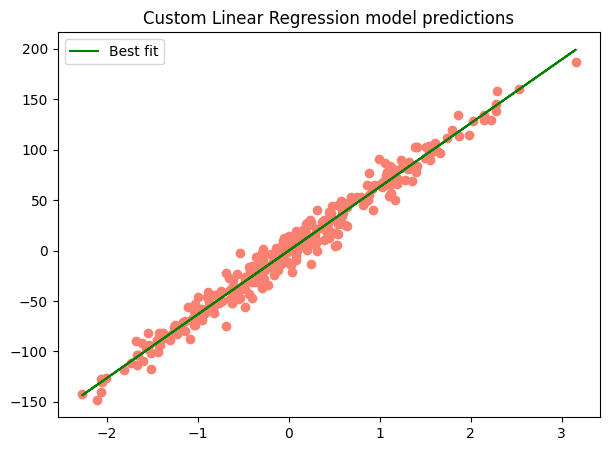

In [10]:
# Plot the data
plt.figure(figsize = (7,5))
plt.scatter(X, y, c = 'salmon')
plt.plot(X, y_preds_2, c = 'green', label = 'Best fit')
plt.title("Custom Linear Regression model predictions")
plt.legend()
plt.show()

In [11]:
# Print the slope and intercept values
print(f'Slope (m): {simple_lin_reg.slope_}')
print(f'Intercept (b): {simple_lin_reg.intercept_}')

Slope (m): [63.10101175]
Intercept (b): [-0.00149886]


## Lets compare the models

In [12]:
# Create a DataFrame for the models results
model_results = pd.DataFrame({'Sklearn_linear_reg' : {'r2_score': r2_score(y, y_preds_1),
                                                      'slope': linear_reg.coef_,
                                                      'intercept': linear_reg.intercept_},
                              'Custom_linear_reg' : {'r2_score': r2_score(y, y_preds_2),
                                                     'slope': simple_lin_reg.slope_,
                                                     'intercept': simple_lin_reg.intercept_}})
model_results

,Sklearn_linear_reg,Custom_linear_reg
r2_score,0.974623,0.974623
slope,[63.10101174954125],[63.10101174954128]
intercept,-0.001499,[-0.0014988598836366274]


The values of R2 Score, Slope and Intercept are pretty muhc identical. So, we can say that we were able to replicate the Linear Regression using one variable.